<a href="https://colab.research.google.com/github/StillWork/AIPM/blob/main/PM_RUL_Model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 환경 설정

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 데이터 읽기

In [ ]:
data=pd.read_csv('https://raw.githubusercontent.com/SRIKALYAN03/Predictive-Maintenance-of-Machines/refs/heads/main/predictive_maintenance_dataset(1).csv')
data[:5]

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,01-01-2003,S1F01085,0,203606672,55,0,52,6,407438,0,0,7
1,01-01-2003,S1F0046B,0,60050680,0,3,0,6,400654,0,0,0
2,01-01-2003,S1F01E6Y,0,50655968,0,0,0,12,117394,0,0,0
3,01-01-2003,S1F01JE0,0,79694012,0,0,0,6,410066,0,0,0
4,01-01-2003,S1F01R2B,0,3970480,0,0,0,3,61053,0,0,3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124135 entries, 0 to 124134
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   date     124135 non-null  object
 1   device   124135 non-null  object
 2   failure  124135 non-null  int64 
 3   metric1  124135 non-null  int64 
 4   metric2  124135 non-null  int64 
 5   metric3  124135 non-null  int64 
 6   metric4  124135 non-null  int64 
 7   metric5  124135 non-null  int64 
 8   metric6  124135 non-null  int64 
 9   metric7  124135 non-null  int64 
 10  metric8  124135 non-null  int64 
 11  metric9  124135 non-null  int64 
dtypes: int64(10), object(2)
memory usage: 11.4+ MB


In [ ]:
data['date']=pd.to_datetime(data['date'],errors='coerce')
data[:5]

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,2003-01-01,S1F01085,0,203606672,55,0,52,6,407438,0,0,7
1,2003-01-01,S1F0046B,0,60050680,0,3,0,6,400654,0,0,0
2,2003-01-01,S1F01E6Y,0,50655968,0,0,0,12,117394,0,0,0
3,2003-01-01,S1F01JE0,0,79694012,0,0,0,6,410066,0,0,0
4,2003-01-01,S1F01R2B,0,3970480,0,0,0,3,61053,0,0,3


In [ ]:
data=data.sort_values(by=['device','date'])
data[:5]

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
471,2003-01-01,S1F00112,0,50004094,0,0,0,8,80901,0,0,0
11731,2003-01-01,S1F00112,0,66408032,0,0,0,8,95874,0,0,0
20312,2003-01-01,S1F00112,0,60439704,0,0,0,8,99709,0,0,0
1634,2003-01-02,S1F00112,0,70097400,0,0,0,8,82032,0,0,0
12463,2003-01-02,S1F00112,0,207090488,0,0,0,8,97001,0,0,0


In [ ]:
data.isnull().sum()

,0
date,3580
device,0
failure,0
metric1,0
metric2,0
metric3,0
metric4,0
metric5,0
metric6,0
metric7,0


In [ ]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 120555 entries, 471 to 67274
Data columns (total 12 columns):
 #   Column   Non-Null Count   Dtype         
---  ------   --------------   -----         
 0   date     120555 non-null  datetime64[ns]
 1   device   120555 non-null  object        
 2   failure  120555 non-null  int64         
 3   metric1  120555 non-null  int64         
 4   metric2  120555 non-null  int64         
 5   metric3  120555 non-null  int64         
 6   metric4  120555 non-null  int64         
 7   metric5  120555 non-null  int64         
 8   metric6  120555 non-null  int64         
 9   metric7  120555 non-null  int64         
 10  metric8  120555 non-null  int64         
 11  metric9  120555 non-null  int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 12.0+ MB


In [ ]:
# 디바이스 종류
data['device'].nunique()

1169

In [ ]:
# 디바이스별 센서 데이터 수
data['device'].value_counts()

,count
device,
Z1F0QL3N,294
Z1F0MA1S,294
Z1F0QK05,294
Z1F0QLC1,294
Z1F0Q8RT,294
...,...
Z1F1AGW1,5
S1F003F0,5
S1F04KSC,4


<Axes: xlabel='device'>

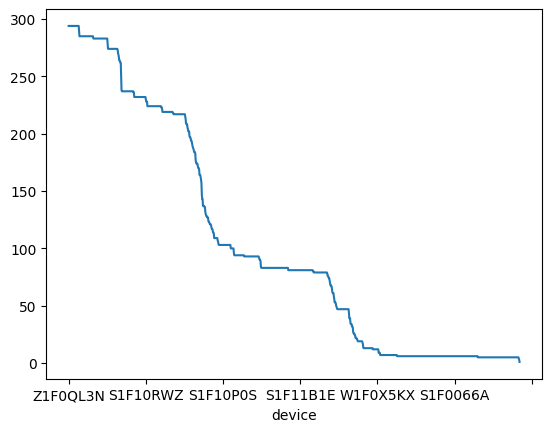

In [ ]:
data['device'].value_counts().plot()

In [ ]:
# 오류가 발생한 횟수 (failure = 1)
data['failure'].value_counts()

,count
failure,
0,120455
1,100


In [ ]:
# 'failure' 값이 1을 포함하는 device 목록 찾기 (고장이 발생한 디바이스 찾기)
devices_with_failure = data[data['failure'] == 1]['device'].unique()
len(devices_with_failure)

100

In [ ]:
devices_with_failure[:5]

array(['S1F00389', 'S1F003TN', 'S1F004J0', 'S1F011H2', 'S1F01H80'],
      dtype=object)

In [ ]:
# 'failure' 값이 1을 포함하는 device 데이터만 취합
data = data[data['device'].isin(devices_with_failure)].copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9786 entries, 473 to 95732
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     9786 non-null   datetime64[ns]
 1   device   9786 non-null   object        
 2   failure  9786 non-null   int64         
 3   metric1  9786 non-null   int64         
 4   metric2  9786 non-null   int64         
 5   metric3  9786 non-null   int64         
 6   metric4  9786 non-null   int64         
 7   metric5  9786 non-null   int64         
 8   metric6  9786 non-null   int64         
 9   metric7  9786 non-null   int64         
 10  metric8  9786 non-null   int64         
 11  metric9  9786 non-null   int64         
dtypes: datetime64[ns](1), int64(10), object(1)
memory usage: 993.9+ KB


In [ ]:
# device 별로 그룹화하여 failure 값들을 리스트에 담기
device_failure_lists = data.groupby('device')['failure'].apply(list)
device_failure_lists[:5]

,failure
device,
S1F00389,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
S1F003TN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
S1F004J0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
S1F011H2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
S1F01H80,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


# failure=1 값이 샘플의 마지막에 나오는지 확인

In [ ]:
for device, failure_list in device_failure_lists.items():
    print(f"Device: {device}")
    print("Failure 값 리스트:", failure_list)

Device: S1F00389
Failure 값 리스트: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Device: S1F003TN
Failure 값 리스트: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
for device, failure_list in device_failure_lists.items():

    # failure 값이 1인 위치 및 리스트의 총 길이
    index_of_failure = failure_list.index(1)
    print(f"{device}: failure=1 위치, {index_of_failure+1}", "\t리스트 총 길이:", len(failure_list))

S1F00389: failure=1 위치, 121 	리스트 총 길이: 121
S1F003TN: failure=1 위치, 193 	리스트 총 길이: 204
S1F004J0: failure=1 위치, 121 	리스트 총 길이: 122
S1F011H2: failure=1 위치, 14 	리스트 총 길이: 19
S1F01H80: failure=1 위치, 97 	리스트 총 길이: 104
S1F03YZM: failure=1 위치, 208 	리스트 총 길이: 208
S1F09DZQ: failure=1 위치, 187 	리스트 총 길이: 193
S1F0CTDN: failure=1 위치, 7 	리스트 총 길이: 7
S1F0DSTY: failure=1 위치, 34 	리스트 총 길이: 44
S1F0F4EB: failure=1 위치, 123 	리스트 총 길이: 123
S1F0GG8X: failure=1 위치, 12 	리스트 총 길이: 18
S1F0GJW3: failure=1 위치, 67 	리스트 총 길이: 74
S1F0GKFX: failure=1 위치, 96 	리스트 총 길이: 113
S1F0GKL6: failure=1 위치, 118 	리스트 총 길이: 129
S1F0GPFZ: failure=1 위치, 197 	리스트 총 길이: 198
S1F0GSD9: failure=1 위치, 128 	리스트 총 길이: 143
S1F0GSHB: failure=1 위치, 208 	리스트 총 길이: 208
S1F0J5JH: failure=1 위치, 187 	리스트 총 길이: 187
S1F0JD7P: failure=1 위치, 96 	리스트 총 길이: 96
S1F0JGJV: failure=1 위치, 269 	리스트 총 길이: 269
S1F0L0DW: failure=1 위치, 132 	리스트 총 길이: 136
S1F0LCTV: failure=1 위치, 6 	리스트 총 길이: 25
S1F0LCVC: failure=1 위치, 99 	리스트 총 길이: 114
S1F0LD2C: failure=1 위치, 67 	리스트

In [ ]:
# 각 device 별로 failure가 1이 나온 이후의 샘플들을 버리기
filtered_data_list = []
for device, group in data.groupby('device'):
    failure_indices = group[group['failure'] == 1].index.tolist()
    # 첫 번째 failure=1의 인덱스까지 데이터를 유지
    first_failure_index = failure_indices[0]
    filtered_group = group.loc[:first_failure_index]
    filtered_data_list.append(filtered_group)

# 필터링된 데이터들을 다시 하나의 데이터프레임으로 합치기
new_data = pd.concat(filtered_data_list)

# 각 device 별로 failure의 마지막 값만 1로 되어 있는지 확인
print("\n각 device 별 failure 마지막 값 확인:")
last_failure_values = new_data.groupby('device')['failure'].tail(1)
display(last_failure_values.value_counts())

# 모든 device의 마지막 failure 값이 1인지 최종 확인
all_last_failures_are_one = (last_failure_values == 1).all()
print(f"\n모든 device의 마지막 failure 값이 1인지 여부: {all_last_failures_are_one}")


각 device 별 failure 마지막 값 확인:


,count
failure,
1,100



모든 device의 마지막 failure 값이 1인지 여부: True


In [ ]:
device_failure_lists = new_data.groupby('device')['failure'].apply(list)
device_failure_lists[:5]

,failure
device,
S1F00389,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
S1F003TN,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
S1F004J0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
S1F011H2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]"
S1F01H80,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [ ]:
for device, failure_list in device_failure_lists.items():

    # failure 값이 1인 위치 및 리스트의 총 길이
    index_of_failure = failure_list.index(1)
    print(f"{device}: failure=1 위치, {index_of_failure+1}", "\t리스트 총 길이:", len(failure_list))

S1F00389: failure=1 위치, 121 	리스트 총 길이: 121
S1F003TN: failure=1 위치, 193 	리스트 총 길이: 193
S1F004J0: failure=1 위치, 121 	리스트 총 길이: 121
S1F011H2: failure=1 위치, 14 	리스트 총 길이: 14
S1F01H80: failure=1 위치, 97 	리스트 총 길이: 97
S1F03YZM: failure=1 위치, 208 	리스트 총 길이: 208
S1F09DZQ: failure=1 위치, 187 	리스트 총 길이: 187
S1F0CTDN: failure=1 위치, 7 	리스트 총 길이: 7
S1F0DSTY: failure=1 위치, 34 	리스트 총 길이: 34
S1F0F4EB: failure=1 위치, 123 	리스트 총 길이: 123
S1F0GG8X: failure=1 위치, 12 	리스트 총 길이: 12
S1F0GJW3: failure=1 위치, 67 	리스트 총 길이: 67
S1F0GKFX: failure=1 위치, 96 	리스트 총 길이: 96
S1F0GKL6: failure=1 위치, 118 	리스트 총 길이: 118
S1F0GPFZ: failure=1 위치, 197 	리스트 총 길이: 197
S1F0GSD9: failure=1 위치, 128 	리스트 총 길이: 128
S1F0GSHB: failure=1 위치, 208 	리스트 총 길이: 208
S1F0J5JH: failure=1 위치, 187 	리스트 총 길이: 187
S1F0JD7P: failure=1 위치, 96 	리스트 총 길이: 96
S1F0JGJV: failure=1 위치, 269 	리스트 총 길이: 269
S1F0L0DW: failure=1 위치, 132 	리스트 총 길이: 132
S1F0LCTV: failure=1 위치, 6 	리스트 총 길이: 6
S1F0LCVC: failure=1 위치, 99 	리스트 총 길이: 99
S1F0LD2C: failure=1 위치, 67 	리스트 총 길

In [ ]:
# 1이 나온 이후의 0을 삭제한 데이터 수 감소 확인
len(data), len(new_data)

(9786, 9270)

In [ ]:
# 원본 데이터 백업 및 새 데이터 변수명을 data로 사용
data_raw = data.copy()
data = new_data.copy()

잔여 수명은 고장 시점 - 현재 시점 (날짜 단위로)

In [ ]:
data[:5]

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
473,2003-01-01,S1F00389,0,1021040,0,0,0,4,69879,0,0,0
11733,2003-01-01,S1F00389,0,60005040,0,0,0,4,62049,0,0,0
20314,2003-01-01,S1F00389,0,107691056,0,0,0,4,64576,0,0,0
1636,2003-01-02,S1F00389,0,50597704,0,0,0,4,21094,0,0,0
12465,2003-01-02,S1F00389,0,205062088,0,0,0,4,63506,0,0,0


In [ ]:
data['RUL']=data.groupby('device')['date'].transform(lambda x: (x.max()-x).dt.days)
data[:20]

,date,device,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,RUL
473,2003-01-01,S1F00389,0,1021040,0,0,0,4,69879,0,0,0,124
11733,2003-01-01,S1F00389,0,60005040,0,0,0,4,62049,0,0,0,124
20314,2003-01-01,S1F00389,0,107691056,0,0,0,4,64576,0,0,0,124
1636,2003-01-02,S1F00389,0,50597704,0,0,0,4,21094,0,0,0,123
12465,2003-01-02,S1F00389,0,205062088,0,0,0,4,63506,0,0,0,123
21026,2003-01-02,S1F00389,0,80656536,0,0,0,4,64576,0,0,0,123
24589,2003-01-02,S1F00389,0,203920064,0,0,0,4,64585,0,0,0,123
2799,2003-01-03,S1F00389,0,77536320,0,0,0,4,20202,0,0,0,122
13181,2003-01-03,S1F00389,0,98565672,0,0,0,4,64407,0,0,0,122
21737,2003-01-03,S1F00389,0,77500664,0,0,0,4,64582,0,0,0,122


In [ ]:
# 주일, 월 데이터 컬럼 추가
data['day_of_week']=data['date'].dt.dayofweek
data['month']=data['date'].dt.month

In [ ]:
for metric in ['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9']:
    data[f'{metric}_rolling_mean']=data.groupby('device')[metric].transform(lambda x: x.rolling(5,min_periods=1).mean())

In [ ]:
data.drop(columns=['date'],inplace=True)

In [ ]:
# 목적변수와 디바이스명 삭제
fc=data.columns.difference(['RUL', 'device'])
X=data[fc]
y=data['RUL']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model=RandomForestRegressor(n_estimators=100)
model.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
from sklearn.metrics import r2_score
y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
print(f'R score:{r2:.2f}')

R score:0.92


In [ ]:
import joblib



model_filename = 'random_forest_model.pkl'
joblib.dump(model, model_filename)

print(f'Model saved to {model_filename}')


Model saved to random_forest_model.pkl


In [ ]:
import joblib
from sklearn.preprocessing import StandardScaler

# Define and fit the scaler
scaler = StandardScaler()
scaler.fit(X_train)


# Save the feature names
joblib.dump(fc, 'feature_names.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')

print("Feature names and scaler saved.")


Feature names and scaler saved.


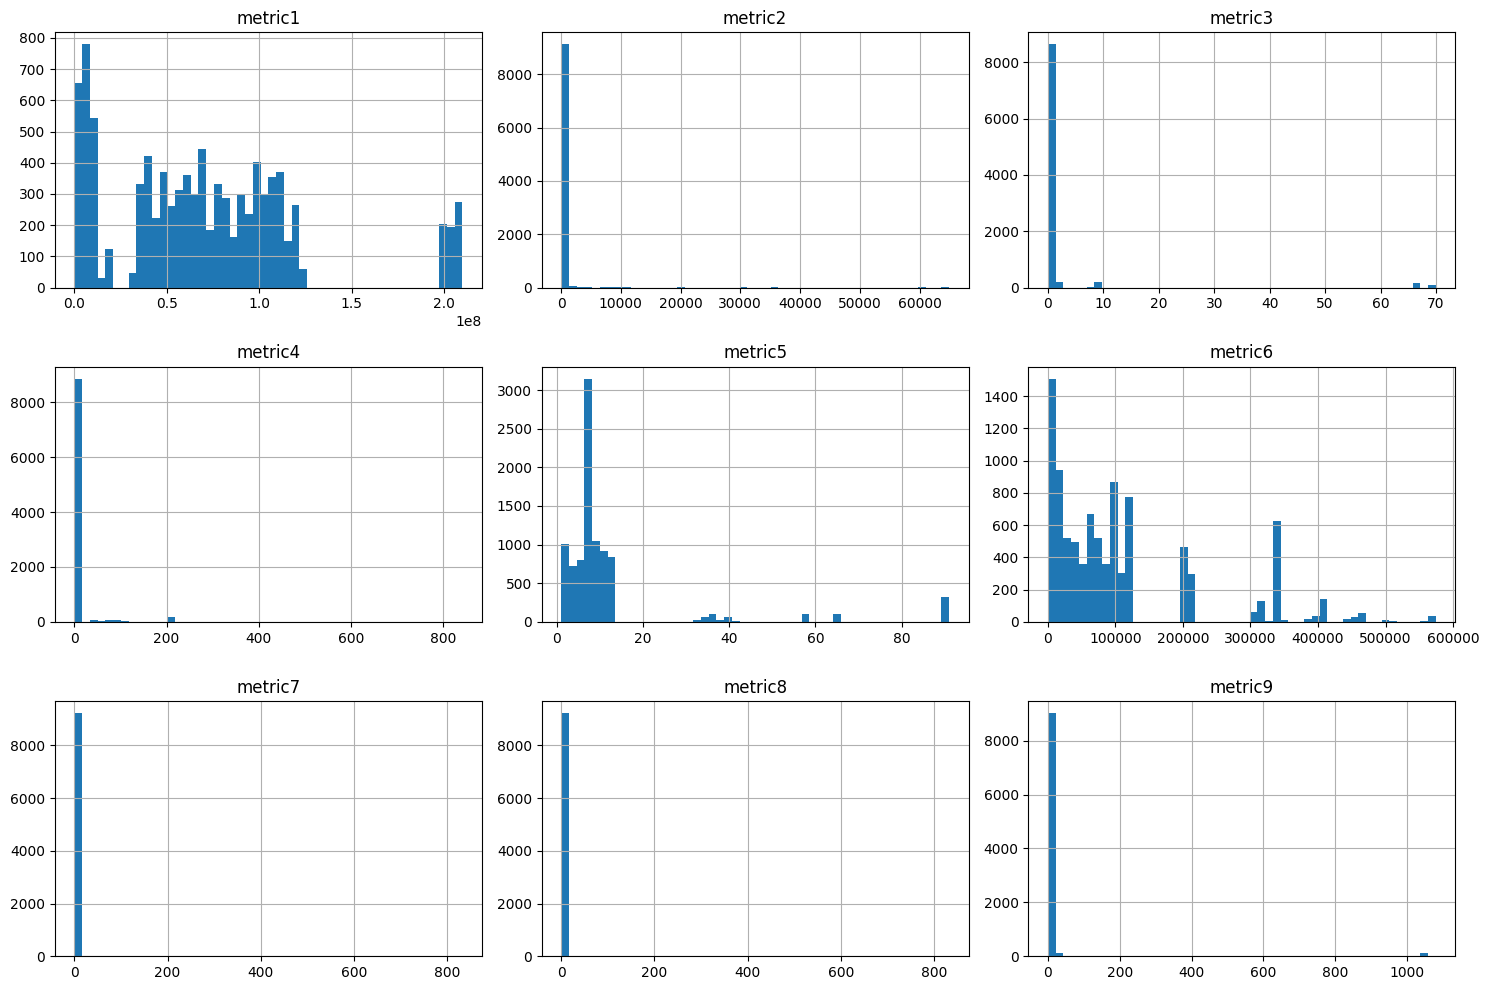

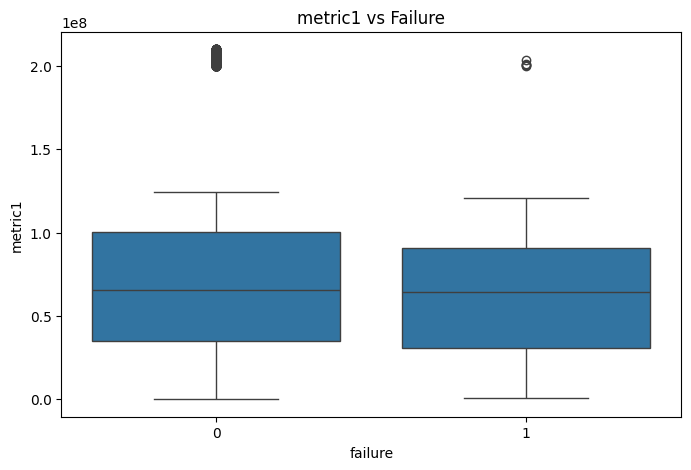

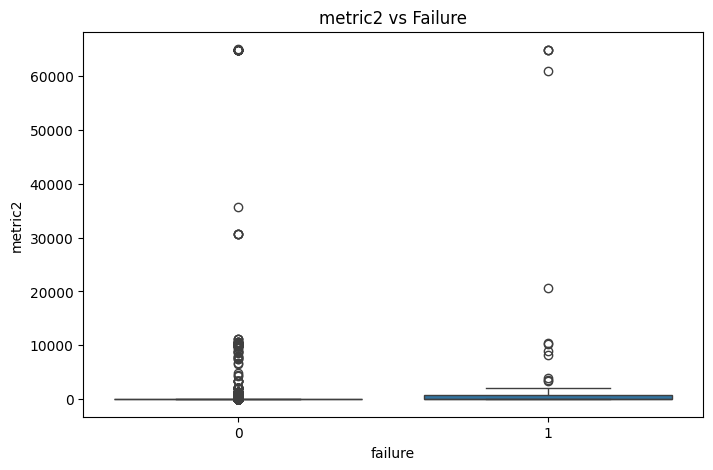

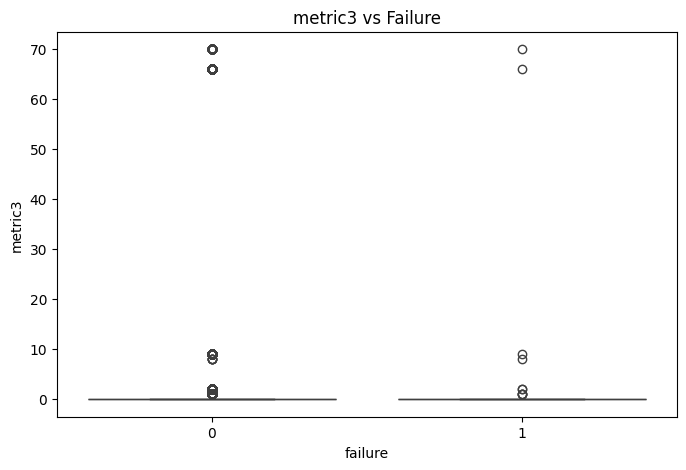

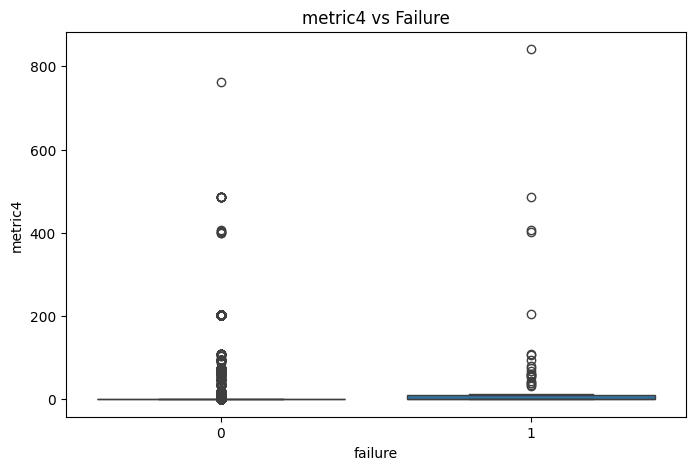

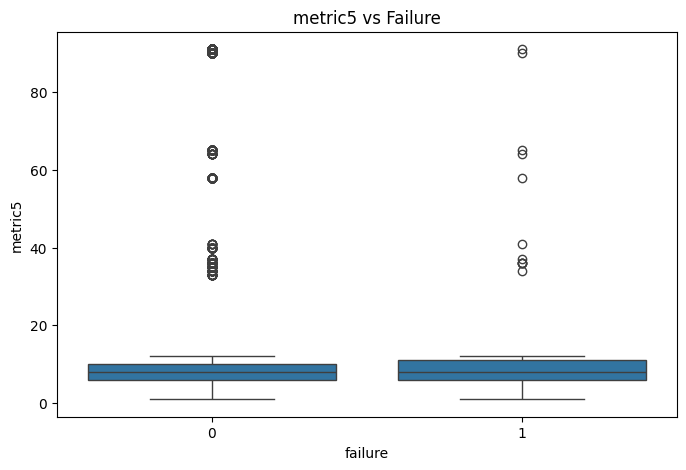

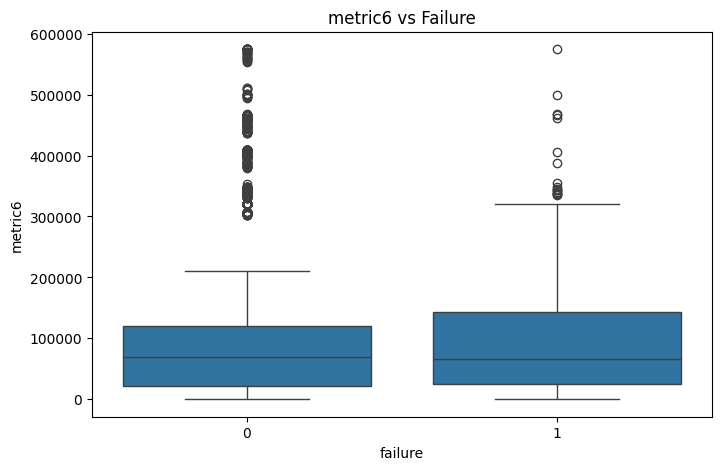

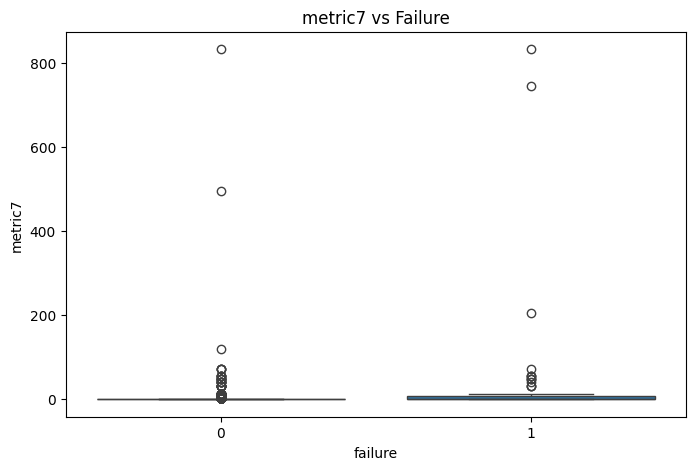

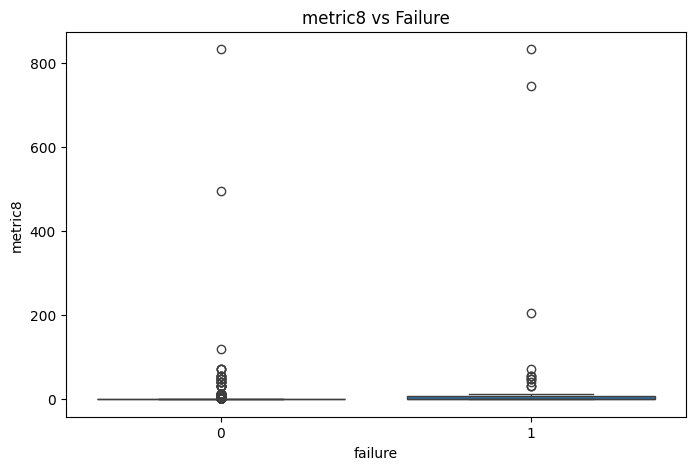

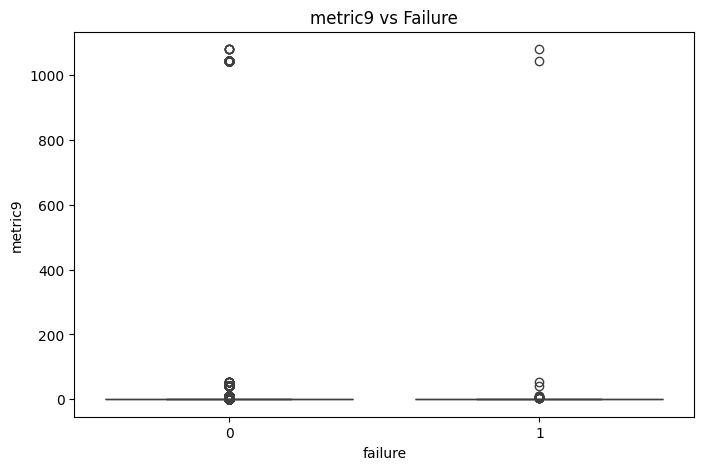

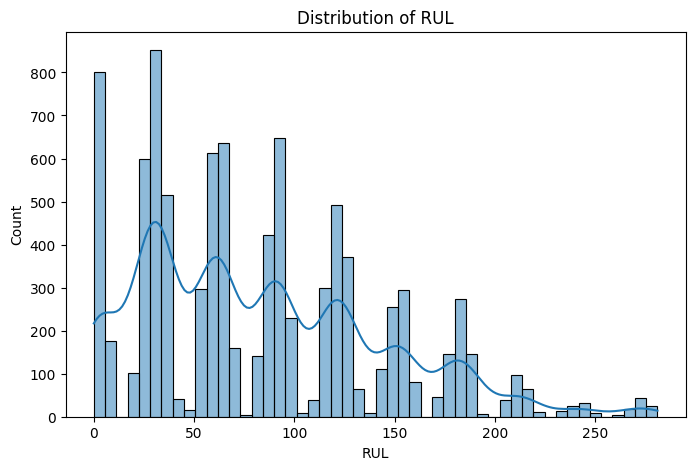

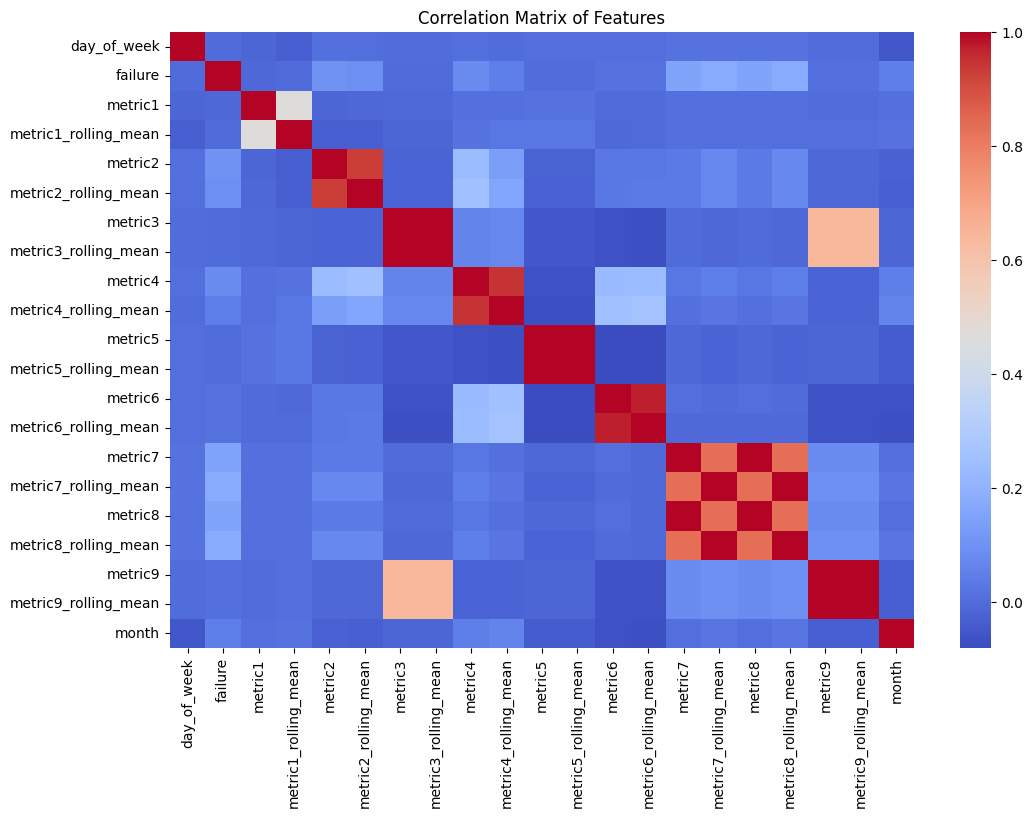

In [ ]:

# 각 metric 컬럼의 분포 시각화 (예: 히스토그램)
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9']
data[metrics].hist(bins=50, figsize=(15, 10))
plt.tight_layout()
plt.show()

# 'failure'와 metric 컬럼 간의 관계 시각화 (예: 박스플롯)
for metric in metrics:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='failure', y=metric, data=data)
    plt.title(f'{metric} vs Failure')
    plt.show()

# 'RUL' 컬럼의 분포 확인
plt.figure(figsize=(8, 5))
sns.histplot(data['RUL'], bins=50, kde=True)
plt.title('Distribution of RUL')
plt.show()

# 상관 관계 행렬 시각화
plt.figure(figsize=(12, 8))
correlation_matrix = data[fc].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
# 샘플 데이터가 가장 많은 상위 5개 device 찾기
top_5_devices = data['device'].value_counts().nlargest(5).index.tolist()
print("샘플 데이터가 가장 많은 상위 5개 Device:")
print(top_5_devices)

샘플 데이터가 가장 많은 상위 5개 Device:
['Z1F02BGY', 'W1F0T0B1', 'S1F0JGJV', 'Z1F0MRPJ', 'W1F1CB5E']



Device: Z1F02BGY의 Metric 시계열 변화


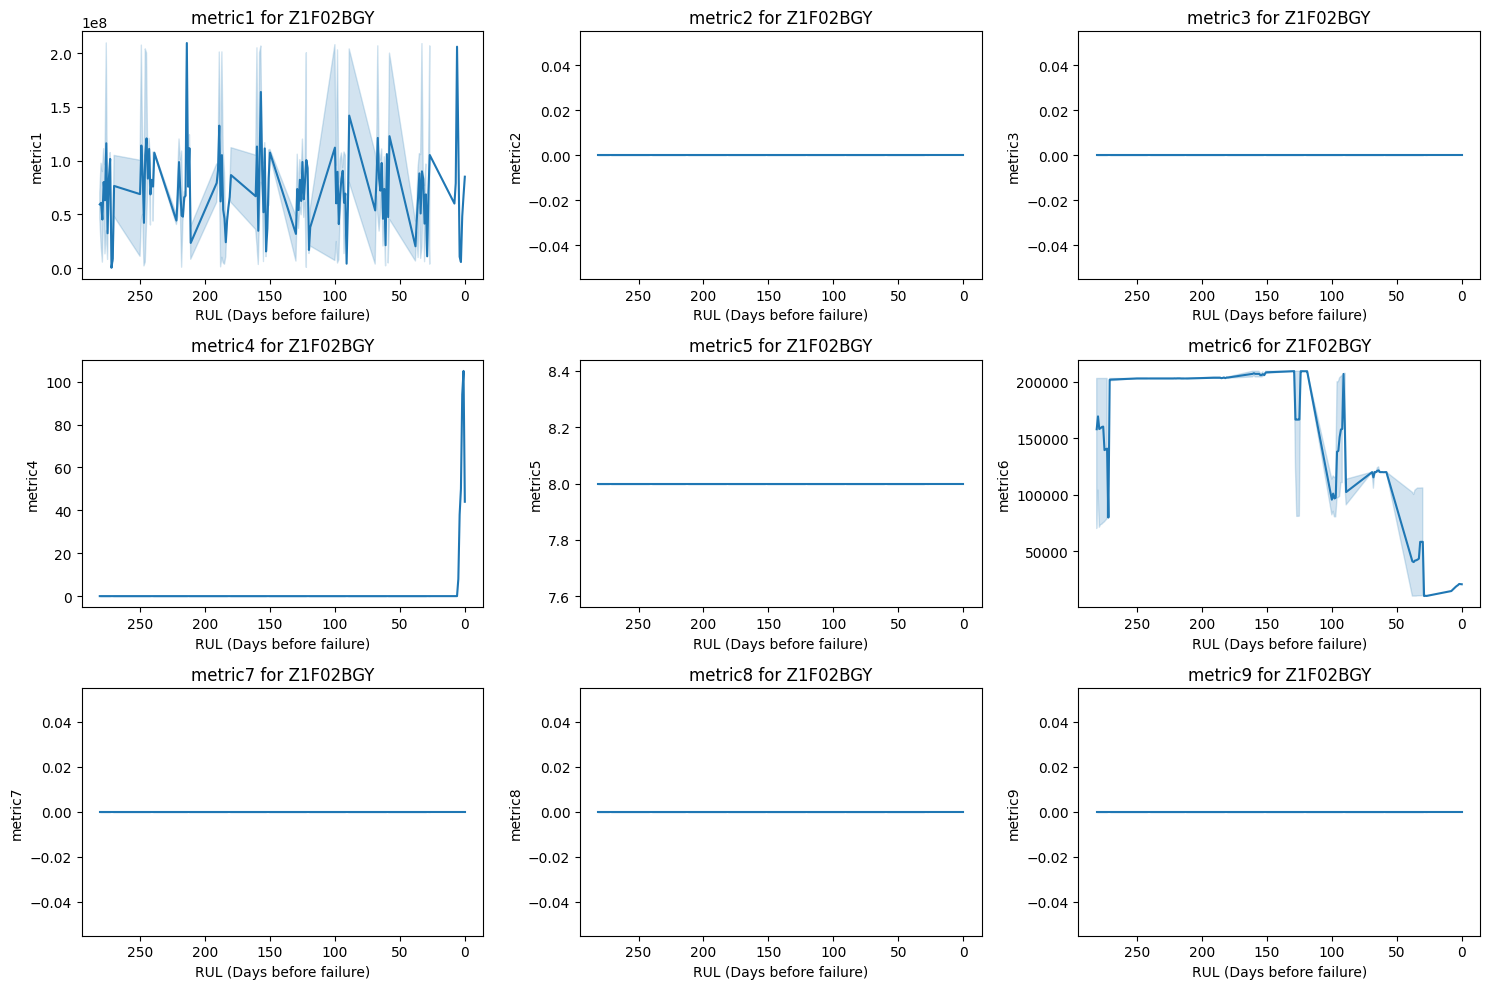


Device: W1F0T0B1의 Metric 시계열 변화


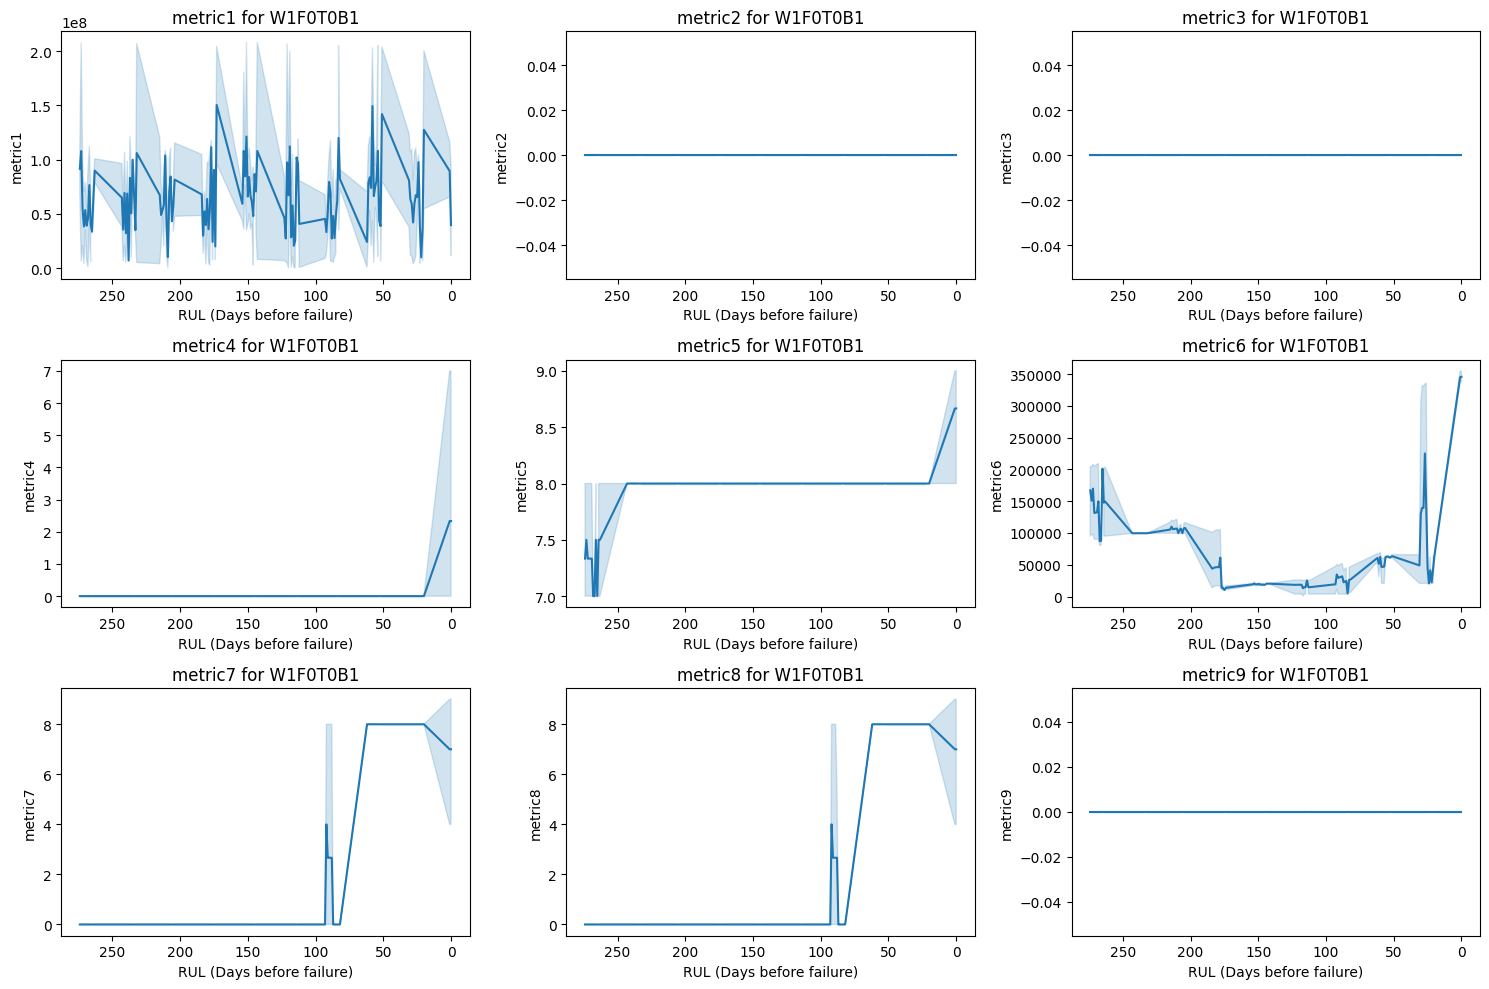


Device: S1F0JGJV의 Metric 시계열 변화


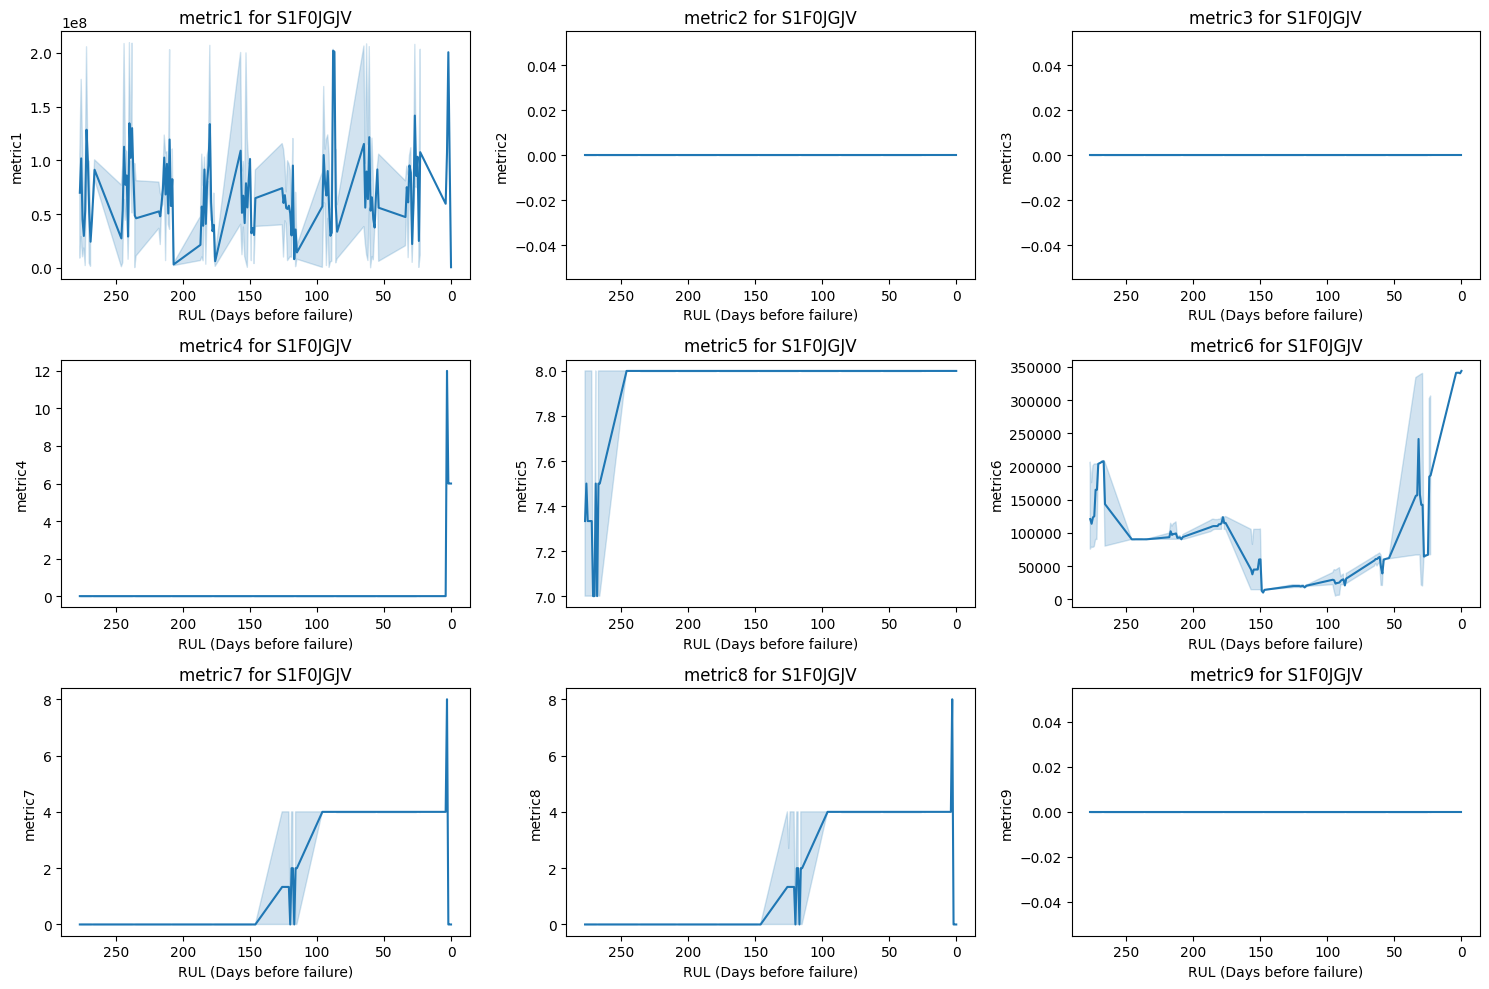


Device: Z1F0MRPJ의 Metric 시계열 변화


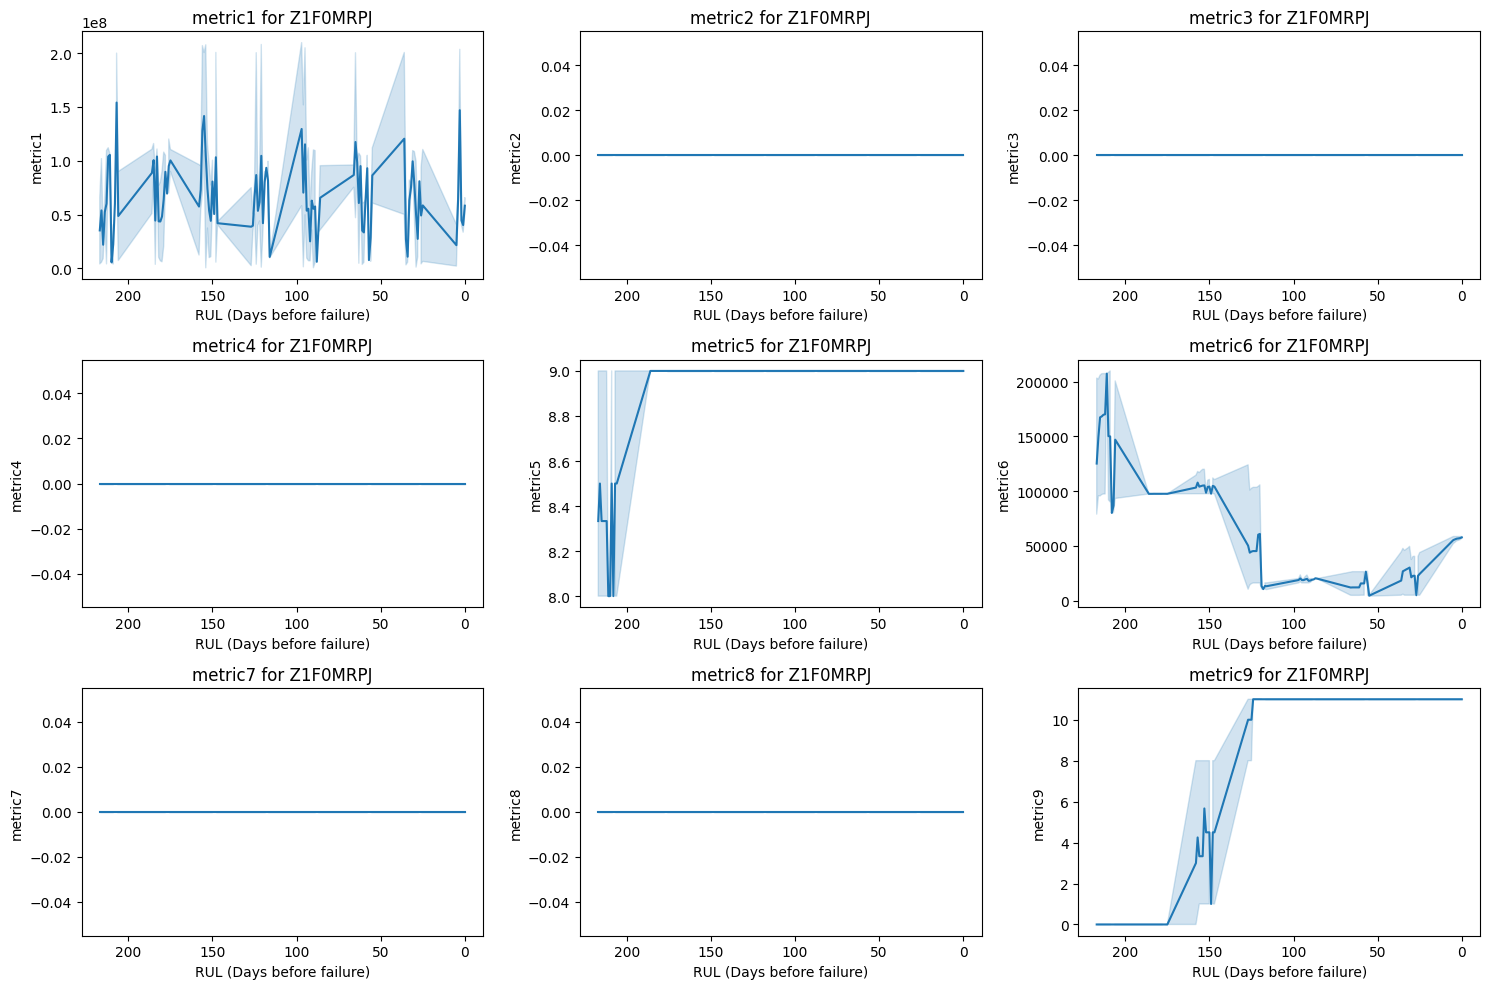


Device: W1F1CB5E의 Metric 시계열 변화


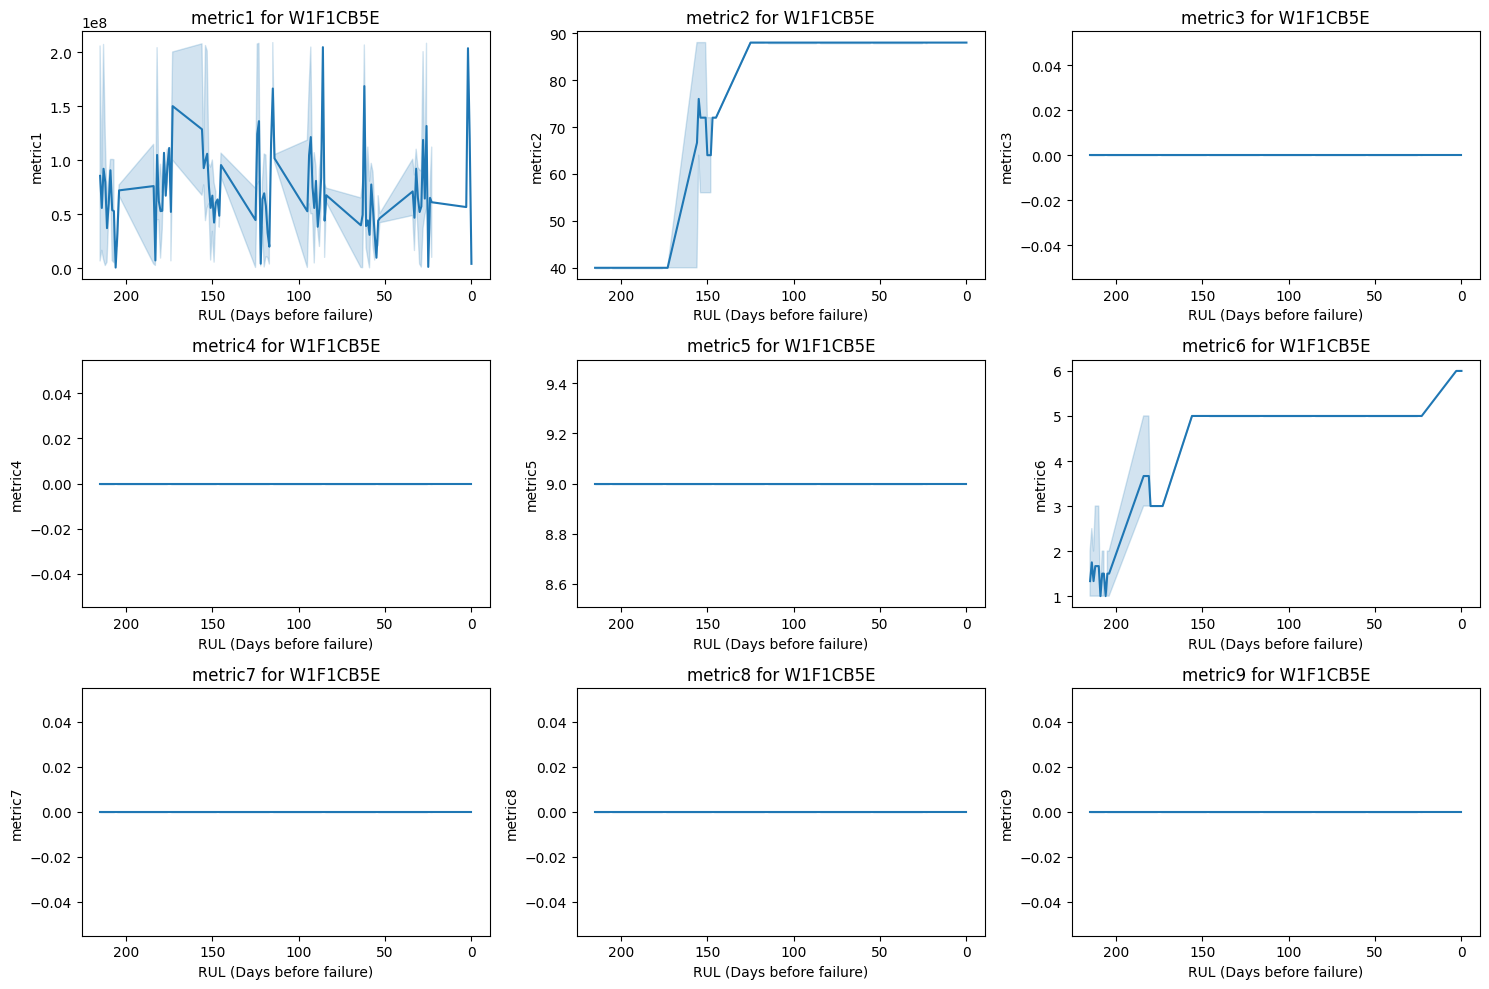

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

metrics = ['metric1', 'metric2', 'metric3', 'metric4', 'metric5', 'metric6', 'metric7', 'metric8', 'metric9']

for device in top_5_devices:
    device_data = data[data['device'] == device].copy()
    print(f"\nDevice: {device}의 Metric 시계열 변화")

    plt.figure(figsize=(15, 10))
    for i, metric in enumerate(metrics):
        plt.subplot(3, 3, i + 1)
        sns.lineplot(x='RUL', y=metric, data=device_data)
        plt.title(f'{metric} for {device}')
        plt.xlabel('RUL (Days before failure)')
        plt.ylabel(metric)
        plt.gca().invert_xaxis() # RUL이 작아질수록 고장 시점에 가까워지도록 x축 반전
    plt.tight_layout()
    plt.show()